In [9]:
import torch as t
%matplotlib inline
from matplotlib import pyplot as plt
from IPython import display

In [10]:
#设置随机数种子，保证在不同计算机上运行时下面的输出一致
t.manual_seed(1000)

def get_fake_data(batch_size=8):
    '''产生随机数据：y=x*2+3，加上了一些噪声'''
    x=t.rand(batch_size,1)*20
    y=x*2+(1+t.randn(batch_size,1))*3
    return x,y

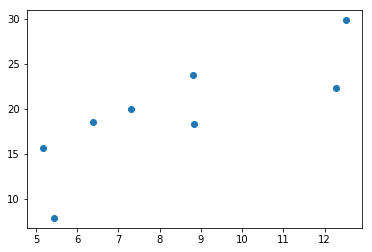

In [11]:
#来看看产生的x-y分布，输出如图
x,y=get_fake_data()
plt.scatter(x.squeeze().numpy(),y.squeeze().numpy())

In [34]:
#随机初始化参数
w=t.rand(1,1)
b=t.zeros(1,1)

lr=0.001 #学习率

for ii in range(20000):
    x,y=get_fake_data()
    
    # forward : 计算loss
    y_pred=x.mm(w)+b.expand_as(y)
    loss=0.5*(y_pred-y)**2 #均方误差
    loss=loss.sum()
    
    # backward :手动计算梯度
    dloss=1
    dy_pred=dloss*(y_pred-y)
    
    dw=x.t().mm(dy_pred)
    db=dy_pred.sum()
    
    #更新参数
    w.sub_(lr*dw)
    b.sub_(lr*db)
    if ii%1000==0:
        #画图
        display.clear_output(wait=True)
        x=t.arange(0,20).view(-1,1)
        print(x.type())
        print(w)
       
        print(w.type())
        y1=x.mm(w)
        y2=b.expand_as(x)
        plt.plot(x.numpy(),y.numpy()) # predicted
        
        x2,y2=get_fake_data(batch_size=20)
        plt.scatter(x2.numpy(),y2.numpy()) # true data
        
        plt.xlim(0,20)
        plt.ylim(0,41)
        plt.show() #程序输出
        plt.pause(0.5)
        
        print(w.squeeze()[0],b.squeeze()[0])

torch.LongTensor
tensor([[2.6392]])
torch.FloatTensor


RuntimeError: Expected object of type torch.LongTensor but found type torch.FloatTensor for argument #2 'mat2'